# Imports

In [1]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.9/618.9 kB 7.9 MB/s eta 0:00:00


# Helper functions

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Print image function

def print_image(image_path, figsize=(10,10)):
  img = mpimg.imread(image_path)

  plt.figure(figsize=figsize)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

# Dataset

In [20]:
!pip install roboflow -q

from roboflow import Roboflow
rf = Roboflow(api_key="4WOW3qLWIEesUVhweOCi")
project = rf.workspace("innopolis-university-5kqay").project("grocery-products-detection")
dataset = project.version(4).download("yolov8")

print(f"Location: {dataset.location}")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.195, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Grocery-products-detection-4 in yolov8:: 100%|██████████| 772/772 [00:00<00:00, 4219.63it/s]


Location: /content/Grocery-products-detection-4


## Move data.yaml to the root

In [21]:
!cp Grocery-products-detection-4/data.yaml data.yaml

# Train YOLOv8 small

In [22]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/../data.yaml \
epochs=100 \
imgsz=640

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Grocery-products-detection-4/../data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

# Training dataset exploration

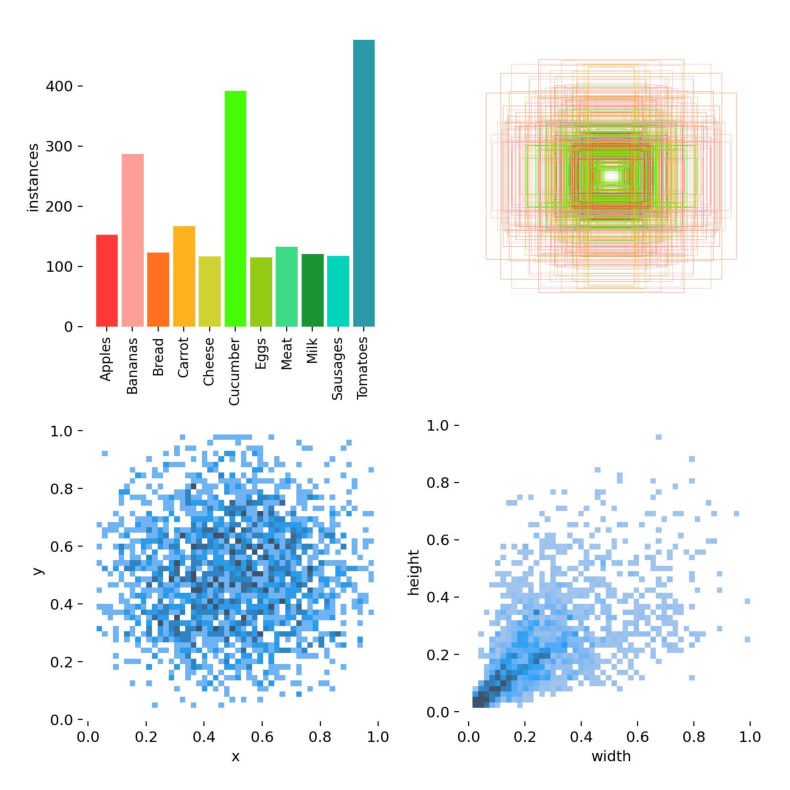

In [23]:
print_image('./runs/detect/train/labels.jpg')

### Print graphs with training metrics

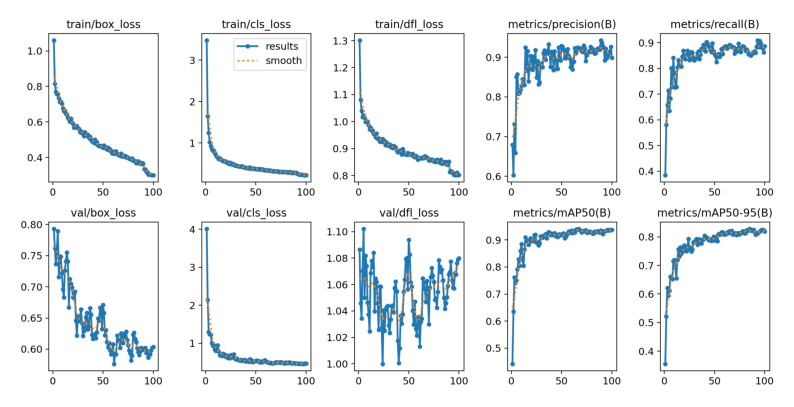

In [24]:
print_image('./runs/detect/train/results.png')

### Print confusion matrix

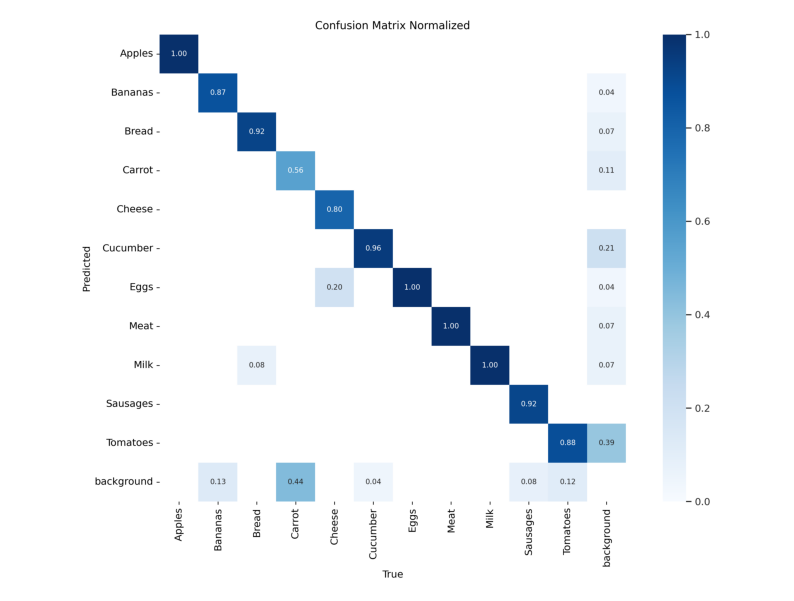

In [25]:
print_image('./runs/detect/train/confusion_matrix_normalized.png')


# Validate the trained model

In [26]:
!yolo task=detect \
mode=val \
model=/content/runs/detect/train/weights/best.pt \
data={dataset.location}/../data.yaml

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Grocery-products-detection-4/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Grocery-products-detection-4/valid/images/Bread4_jpg.rf.1986c951a4ed26bab71d6f42c8fbfab7.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:03<00:00,  1.65s/it]
                   all         31        198      0.907      0.857      0.929      0.826
                Apples         31         12      0.981          1      0.995      0.995
               Bananas         31         31          1      0.724       0.94      0.818
                 Bread         31         13      0.851      0.923      0.979      0.753
                Carrot         31         18      0.667      0.445

## Print validation images

### True labels

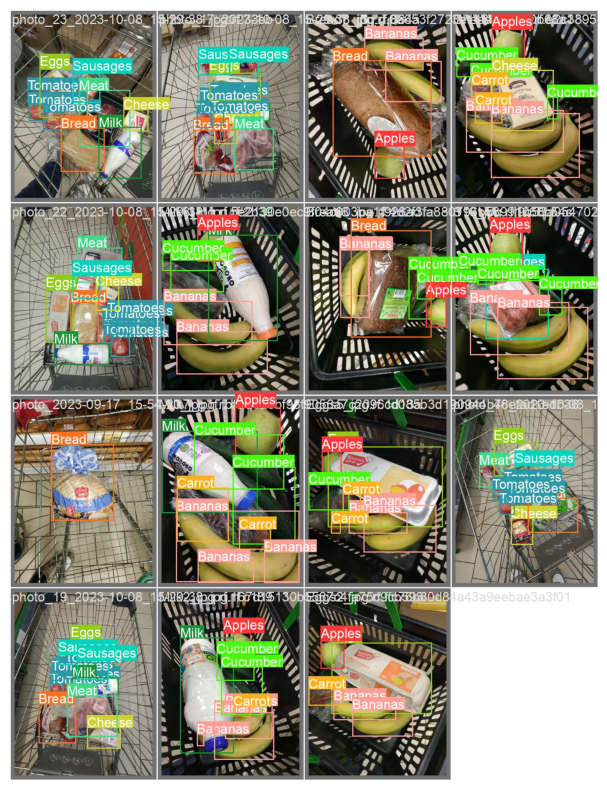

In [28]:
print_image('./runs/detect/val/val_batch1_labels.jpg')

### Predicted

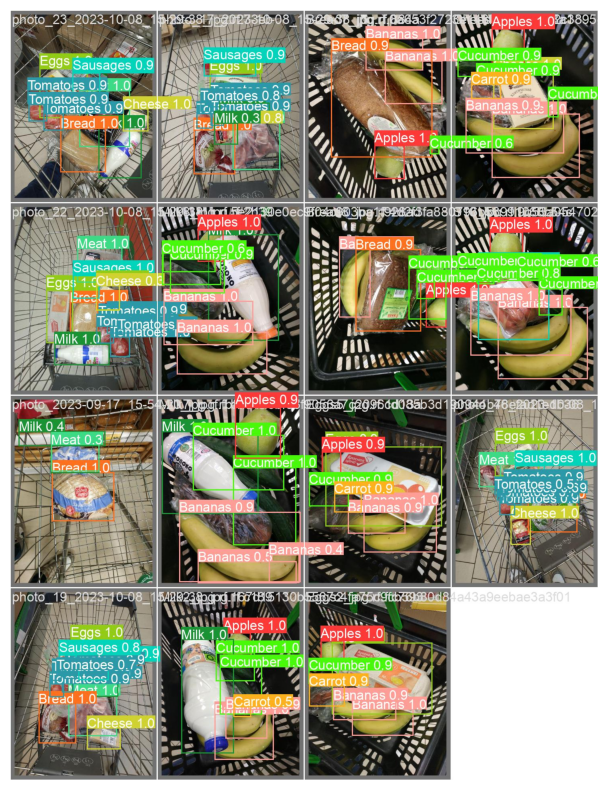

In [29]:
print_image('./runs/detect/val/val_batch1_pred.jpg')

# Test trained model

In [27]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train/weights/best.pt \
conf=0.4 \
source={dataset.location}/test/images

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs

image 1/16 /content/Grocery-products-detection-4/test/images/Bananas1_jpg.rf.43657a96d1c4f3d1c9a1d6bf6953d8a5.jpg: 640x480 5 Bananass, 143.8ms
image 2/16 /content/Grocery-products-detection-4/test/images/Bananas7_jpg.rf.01b8b6592c0c392fde85220d8ce7df90.jpg: 640x480 3 Bananass, 1 Cucumber, 12.1ms
image 3/16 /content/Grocery-products-detection-4/test/images/Bread1_jpg.rf.a2ebabbcfb8a1e98ffdc74b3c9ded1ef.jpg: 640x480 1 Apples, 2 Bananass, 1 Bread, 2 Cucumbers, 12.1ms
image 4/16 /content/Grocery-products-detection-4/test/images/Bread6_jpg.rf.9722865773fbda23dac78b02e651f880.jpg: 640x480 1 Apples, 3 Bananass, 1 Bread, 1 Carrot, 5 Cucumbers, 12.1ms
image 5/16 /content/Grocery-products-detection-4/test/images/Chesse7_jpg.rf.7618d659cfb2c5dd1ba7115da15b1b04.jpg: 640x480 1 Apples, 2 Bananass, 1 Carrot, 1 Cheese, 3 Cucumbers, 12

# Deploy the model to roboflow project

In [30]:
project.version(dataset.version).deploy(model_type='yolov8', model_path=f'/content/runs/detect/train2/')


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.195, to fix: `pip install ultralytics==8.0.134`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/innopolis-university-5kqay/grocery-products-detection/4
Share your model with the world at: https://universe.roboflow.com/innopolis-university-5kqay/grocery-products-detection/model/4
